In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_titanic = pd.read_csv('titanic_new_family.csv')
print(data_titanic.shape)
data_titanic.info()
data_titanic.head()
# *survived = 생존여부
# *pclass = 객실등급
# *sex = 성별
# *age = 나이
# *sibsp = 탑승 형제자매,배우자 수
# *parch = 탑승 부모,자녀 수
# fare = 운임
# embarked = 승선항
# class = 객실등급
# who = 남,녀,아
# deck = 객실 갑판 정보
# embark_town = 승선도시
# alive = 생존여부
# alone = 개인 탑승 여부
# *age2 = n0대 여부
# *family = 총 동선자

(891, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
 15  age2         891 non-null    int64  
 16  family       891 non-null    int64  
dtypes: bool(2), float64(2), int64(7), object(6)
memory usage: 106.3+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1


In [3]:
data_titanic.drop(data_titanic.columns[6:15], axis=1, inplace=True)
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   age2      891 non-null    int64  
 7   family    891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [4]:
Y = data_titanic['survived']
X = data_titanic.drop(columns=['survived'], axis=1, inplace=False)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# train 70% , test 30%

In [6]:
# 학습
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [7]:
# 이제 테스트 데이터로 예측하고 비교
Y_predice = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_predice)
rmse = np.sqrt(mse)
r2_value = r2_score(Y_test, Y_predice)
print(f"mse : {mse}, rmse : {rmse} ,r2_value : {r2_value}")
# mse, rmse 는 낮을수록 좋은 모델, r2 값은 1에 가까울수록 좋은 모델
# 사실 정확한 모델은 아니라는 말

mse : 0.14145100830381668, rmse : 0.37609973185820894 ,r2_value : 0.39526326068968276


In [8]:
print(f"Y절편의 값={lr.intercept_}")
print(f"회귀계수의 값=\n{pd.Series(data=np.round(lr.coef_,2),index=X.columns)}")
# 즉 pclass 는 낮을수록
# sex 는 0일수록(여성일수록)
# age 는 낮을수록
# sibsp 형제자매,배우자는 없을수록
# parch 부모자식도 없을수록
# age2 는 높을수록
# family 는 적을수록
# 생존율이 높다
# Y = -0.17*pclass -0.52*sex -0.01*age -0.03*sibsp +0.00*parch + 0.04*age2 -0.02*family +1.3756592661806417

Y절편의 값=1.3756592661806417
회귀계수의 값=
pclass   -0.17
sex      -0.52
age      -0.01
sibsp    -0.03
parch     0.00
age2      0.04
family   -0.02
dtype: float64


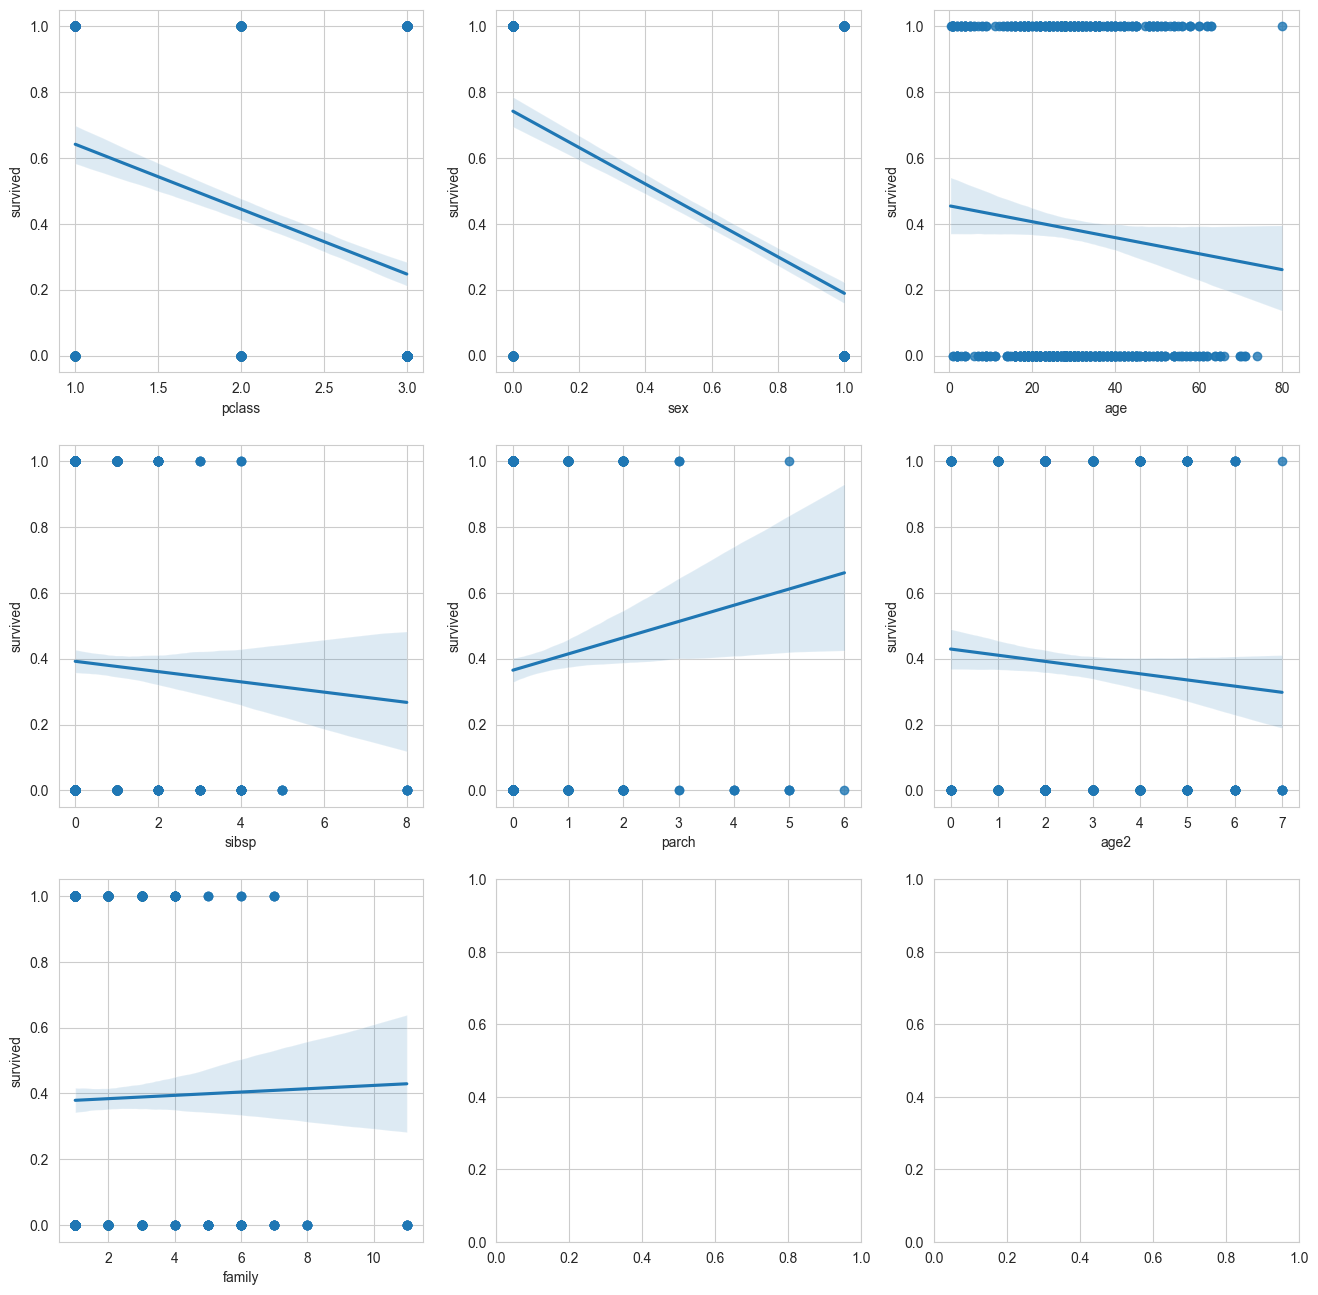

In [9]:
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 3)
x_features = ["pclass","sex","age","sibsp","parch","age2","family"]
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i % 3
    sns.regplot(x = feature, y = "survived", data = data_titanic, ax = axs[row,col])